In [17]:
import random
from collections import defaultdict
import matplotlib.pyplot as plt

In [18]:
def generate_kruskal_maze(width, height):
    """
    Génère un labyrinthe aléatoire en utilisant l'algorithme de Kruskal.
    
    Args:
        width (int): Largeur du labyrinthe
        height (int): Hauteur du labyrinthe
        
    Returns:
        dict: Un dictionnaire représentant le labyrinthe où les clés sont des tuples (x, y)
              et les valeurs sont des ensembles de coordonnées voisines accessibles.
    """
    
    # Initialisation du labyrinthe - chaque case est isolée au départ
    maze = defaultdict(set)
    
    # Création de la liste de tous les murs possibles
    walls = []
    
    # Parcours de toutes les cases pour créer les murs horizontaux et verticaux
    for y in range(height):
        for x in range(width):
            if x < width - 1:
                walls.append(((x, y), (x + 1, y)))  # Mur à droite
            if y < height - 1:
                walls.append(((x, y), (x, y + 1)))  # Mur en dessous
    
    # Mélange aléatoire des murs
    random.shuffle(walls)
    
    # Structure pour l'union-find (disjoint sets)
    parent = {}
    rank = {}
    
    def find(cell):
        """Trouve la racine de la cellule avec compression de chemin."""
        if parent[cell] != cell:
            parent[cell] = find(parent[cell])
        return parent[cell]
    
    def union(cell1, cell2):
        """Union de deux ensembles avec union par rang."""
        root1 = find(cell1)
        root2 = find(cell2)
        
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            else:
                parent[root1] = root2
                if rank[root1] == rank[root2]:
                    rank[root2] += 1
    
    # Initialisation de la structure union-find
    for y in range(height):
        for x in range(width):
            cell = (x, y)
            parent[cell] = cell
            rank[cell] = 0
    
    # Algorithme de Kruskal
    for wall in walls:
        cell1, cell2 = wall
        
        if find(cell1) != find(cell2):
            union(cell1, cell2)
            # Ajout du passage dans les deux directions
            maze[cell1].add(cell2)
            maze[cell2].add(cell1)
    
    return dict(maze)

<BarContainer object of 2414 artists>

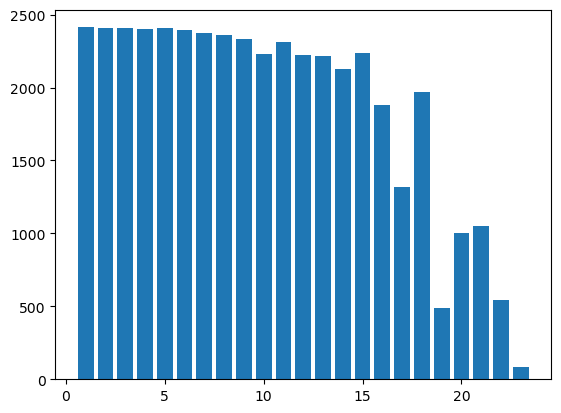

In [54]:
t = [] #labyrinthe
dmaze = {} #nombre d'apparition d'un labyrinthe

for i in range(20000):
    maze = generate_kruskal_maze(3, 4)
    if maze not in t:
        t.append(maze)
        dmaze[t.index(maze)] = 1
    else:
        dmaze[t.index(maze)] += 1

plt.bar([dmaze[t] for t in dmaze], [t for t in dmaze])

17961
99.99999999998212
0.005
0.02
4
{0.005: 16078, 0.01: 1740, 0.015: 130, 0.02: 13}


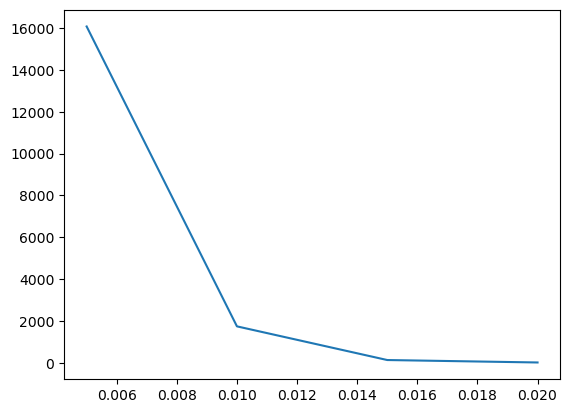

In [50]:
for key in dmaze:
    dmaze[key] = round(((dmaze[key]/20000) * 100),6)
acc = 0
for key in dmaze:
    acc += dmaze[key]
    
print(len(t))
print(acc)

valeurs = [dmaze[key] for key in dmaze]

print(min(valeurs))
print(max(valeurs))

dval = {}
for val in sorted(valeurs):
    if val not in dval:
        dval[val] = 1
    else:
        dval[val] += 1
print(len((dval)))
print(dval)
#plt.plot([val for val in dval], [dval[val] for val in dval])

In [ ]:
print(dval)